## Step 1 Importing necessary libraries

In [150]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data Manipulation
import numpy as np 
import pandas as pd

# Visualizations
import seaborn as sb
import matplotlib.pyplot as plt 
from scipy.stats import boxcox

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# KNN 
from sklearn.neighbors import KNeighborsClassifier

# SVM 
from sklearn.svm import SVC

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

## Step 2 Importing datasets
Next, we have to import and store the data in a variable

In [151]:
heartData = pd.read_csv('https://raw.githubusercontent.com/tgw6201/SC1015/main/archive/heart.csv')

df = pd.DataFrame(heartData)

## Step 3 Analysing dataset

In [152]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Description of dataset

| Variable| Description|Data Type|
|---------|------------|---------|
| age  |Age of patient |Numerical|
| sex | Sex of patient:<br>1: Male<br>0: Female|Binary|
| cp    |Type of chest pain:<br>0: Typical Angina<br>1: Atypical Angina<br>2: Non-Anginal Pain<br>3: Asymptomatic|Categorical|
| trtbps    |Resting blood pressure in mmHg|Numerical|
| chol    |Cholestrol level in mg/dL|Numerical|
| fbs    |Fasting blood sugar level above 120mg/dL<br>0: False<br>1: True|Binary|
| restecg    |Resting Electrocardiographic results:<br>0: Normal<br>1: ST-T wave abnormaility<br>2: Showing probable or definite left ventricular hypertrophy|Categorical|
| thalachh    |Maximum heart rate achieved during a stress test|Numeric|
| exng    |Exercise induced angina:<br>0: No<br>1: Yes|Binary|
| oldpeak    |ST depression induced by exercise relative to rest|Numerical|
| slp    |Slope of the peak exercise ST segment:<br>0: Upsloping<br>1: Flat<br>2: Downsloping|Categorical|
| caa    |Number of major vessels (0-4) colored by fluoroscopy|Numerical|
| thall    |Thalium stress test result:<br>0: Normal<br>1: Fixed defect<br>2: Reversible defect<br>3: Not described|Categorical|
| output    |Heart disease status:<br>0: No Disease<br>1: Heart Disease|Binary|

Next, we need to rename the variable to make the names more meaningful and also changing some of the datasets from binary to categorical so that the dataset will only consist of numerical and categorical.

In [153]:
df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trtbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalachh":"MaxHeartRate",
    "exng":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slp":"STSlope",
    "caa":"nMajorVessels",
    "thall":"Thalium",
    "output":"Status"
}, inplace=True)

In [154]:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
    "ExcerciseAngina": {
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}

Now we can use a for loop to map the corresponding binary data into categorical ones.

In [155]:
def map_values(x, mapping):
    return mapping.get(x, x)

for feature, mapping in mappings.items():
    df[feature] = df[feature].map(lambda x: map_values(x, mapping))
    df[feature] = df[feature].astype(object)

In [156]:
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


This shows that tere are 6 numerical variable in the dataframe

In [157]:
df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   Sex                   303 non-null    object 
 2   ChestPain             303 non-null    object 
 3   RestingBloodPressure  303 non-null    int64  
 4   Cholesterol           303 non-null    int64  
 5   FastingBloodSugar     303 non-null    object 
 6   RestingECG            303 non-null    object 
 7   MaxHeartRate          303 non-null    int64  
 8   ExcerciseAngina       303 non-null    object 
 9   OldPeak               303 non-null    float64
 10  STSlope               303 non-null    object 
 11  nMajorVessels         303 non-null    int64  
 12  Thalium               303 non-null    object 
 13  Status                303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


This shows that there is a total of 303 data points and 14 different variable  
6 of which are numerical, 1 variable is represented by float value and the other 5 by integers  
8 of which are categorical

## Step 4 Univariate Analysis

First part is to do Exploratory Data Analysis of the given data  
We can seperate the data into two groups first, numerical and categorical for easier analysis

In [159]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

numericalData = df[numerical_columns]
categoricalData = df[categorical_columns]

In [160]:
numericalData.info()
categoricalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   RestingBloodPressure  303 non-null    int64  
 2   Cholesterol           303 non-null    int64  
 3   MaxHeartRate          303 non-null    int64  
 4   OldPeak               303 non-null    float64
 5   nMajorVessels         303 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sex                303 non-null    object
 1   ChestPain          303 non-null    object
 2   FastingBloodSugar  303 non-null    object
 3   RestingECG         303 non-null    object
 4   ExcerciseAngina    303 non-null    object
 5  

After seperating the data, we want to analyse the numerical data first

### Function for boxplot, histogram and the violinplot of a given variable

In [161]:
def plotGraphs(df,var):
    f, axes = plt.subplots(1, 3, figsize=(18, 5))
    sb.boxplot(data=df[var], orient="h", ax=axes[0])
    sb.histplot(data=df[var], ax=axes[1])
    sb.violinplot(data=df[var], orient="h", ax=axes[2])

### Visualising the datasets

Base on each of the datasets in `Age`,`RestingBloodPressure`,`Cholestrol`,`MaxHeartRate`,`OldPeak`,`nMajorVessels`  
The boxplot is used to for a better visualisation of the summary statistic  
The histogram helps us visualise the bin size for each of the data  
The violin plot helps combines both the boxplot and histrogram together with the kernal density plot (KDE) to best give us a visualisaiton of the spread of data for each dataset.

In [162]:
def find_outliers_IQR(df):

    Q3 = df.describe()['75%']
    Q1 = df.describe()['25%']

    lowerWhisker = Q1 - 1.5*(Q3-Q1)
    higherWhisker = Q3 + 1.5*(Q3-Q1)

    outliers = 0
    for i in df:
        if(i < lowerWhisker or i > higherWhisker):
            outliers += 1

    return outliers, lowerWhisker, higherWhisker

### Function for calculating the outliers

Since in the boxplot, outliers are values which lies beyond the "whiskers" of the boxplot.  
The boxplot contains 3 quartiles, Q1,Q2 and Q3. Q2 is the median of the data while Q1 represents 25% and Q3 represents 75%.  
The lowest point of the lower whisker is called the lower limit. Lower limit value equals Q1 – 1.5 * (Q3-Q1). The highest point of the upper whisker is the called the upper limit. The upper limit value equals Q3 + 1.5 * (Q3-Q1)

### Function for calculating skewness of the variable

We can check the skew of the data using a skew function in the pandas library this will show us which data type is the most skewed.  
When the value of the skewness is `negative`, the tail of the distribution is longer towards the left hand side of the curve.  
When the value of the skewness is `positive`, the tail of the distribution is longer towards the right hand side of the curve.  

In [163]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")

### Performing Univariate analysis

Next, we will perform univariate analysis, for each numerical data variable

In [164]:
def univariateData(df,var):
    plotGraphs(df,var)
    plt.show()
    x,q1,q3 = find_outliers_IQR(df[var])
    print(var + " outliers: " + str(x))
    print("Lower bound: " + str(q1))
    print("Upper bound: " + str(q3))
    skewness_dist(df,var)

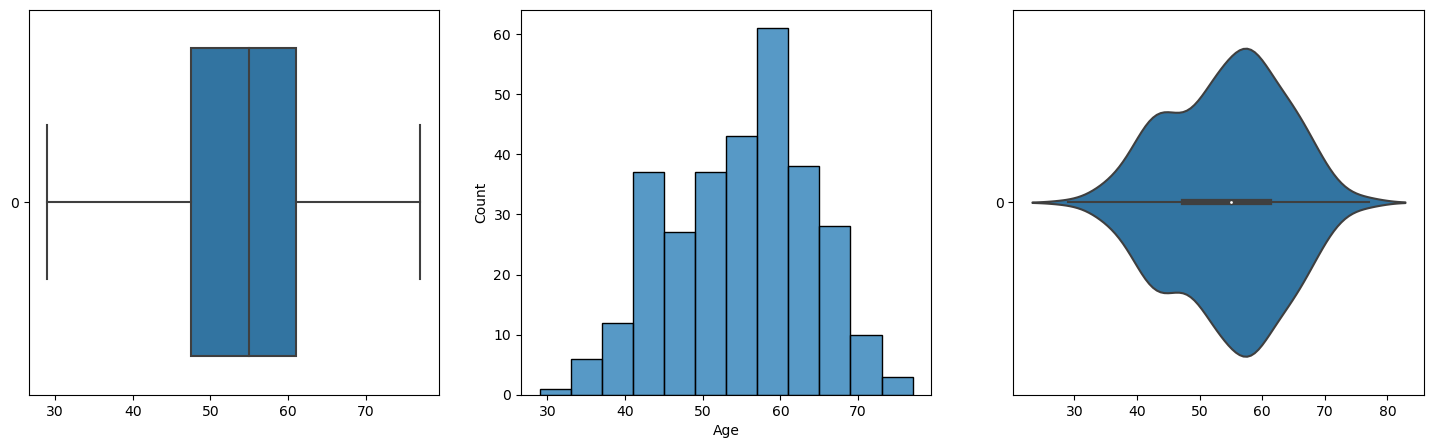

Age outliers: 0
Lower bound: 27.25
Upper bound: 81.25
Skewness of the Age variable: -0.202
The distribution is left-skewed.


In [165]:
univariateData(numericalData,'Age')

We can see that the median is around 55 years old  
The highest frequency of patients were around the age of 58  
The data distribution is left-skewed which implies that there is a higher concentration of older age patients

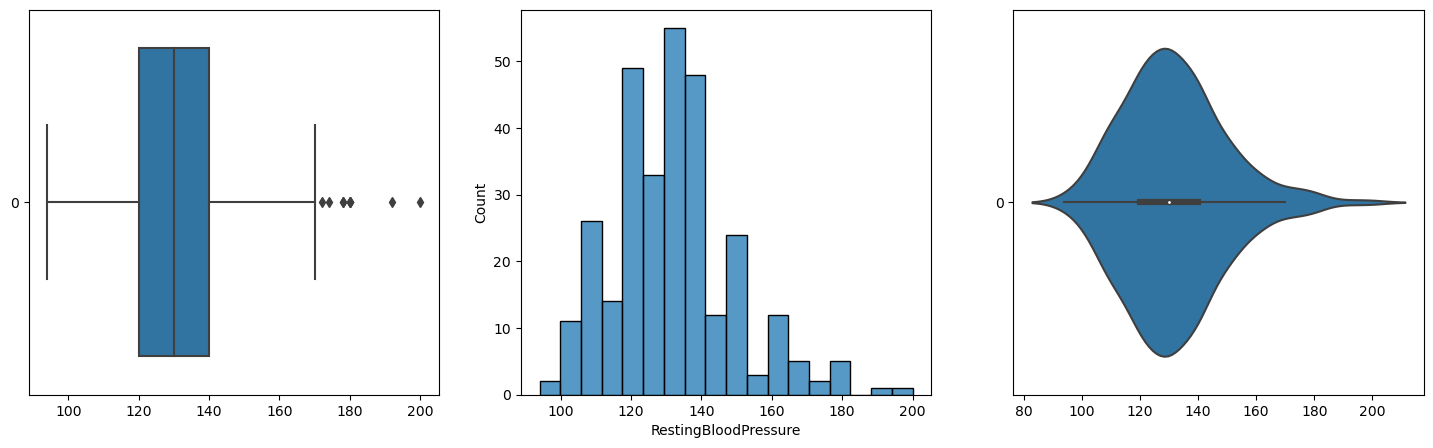

RestingBloodPressure outliers: 9
Lower bound: 90.0
Upper bound: 170.0
Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.


In [166]:
univariateData(numericalData,'RestingBloodPressure')

We can see that the median is around 131.62mmHg  
The highest frequency of `RestingBloodPressure` is around 130mmHg  
The data distribution is right-skewed implying that most patient tend to have lower `RestingBloodPressure`  
There are also 9 outliers which has a RestingBloodPressure of 170mmHg and above

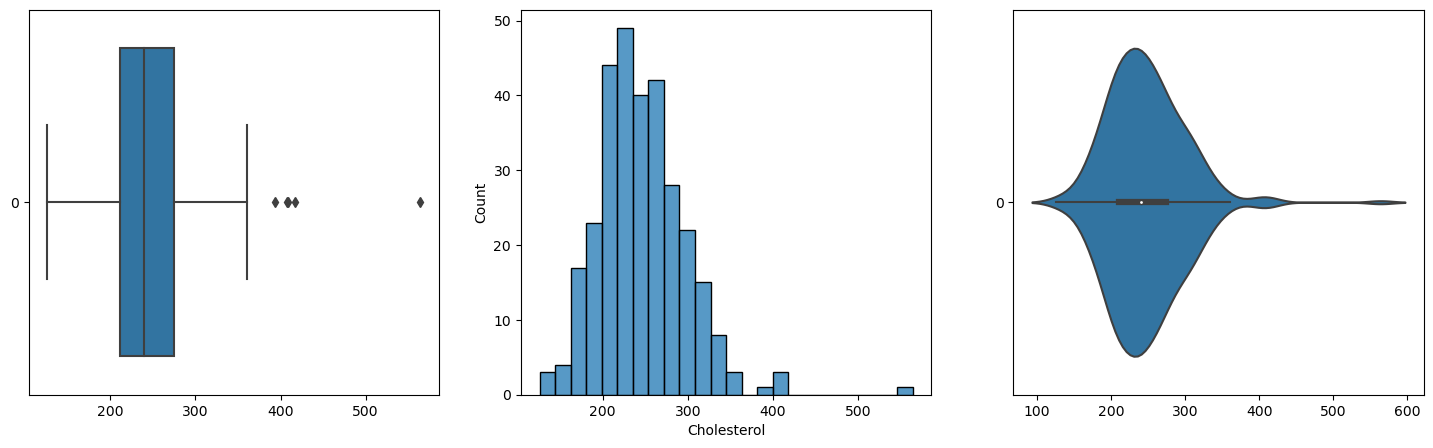

Cholesterol outliers: 5
Lower bound: 115.75
Upper bound: 369.75
Skewness of the Cholesterol variable: 1.143
The distribution is right-skewed.


In [167]:
univariateData(numericalData,'Cholesterol')

The median level of `cholesterol` is aound 240mg/dL  
The most frequent `cholesterol` level is around 220mg/dL  
The skewness of the `cholesterol` graph is right skewed whuch means a higher majority of people have a lower `cholesterol` level

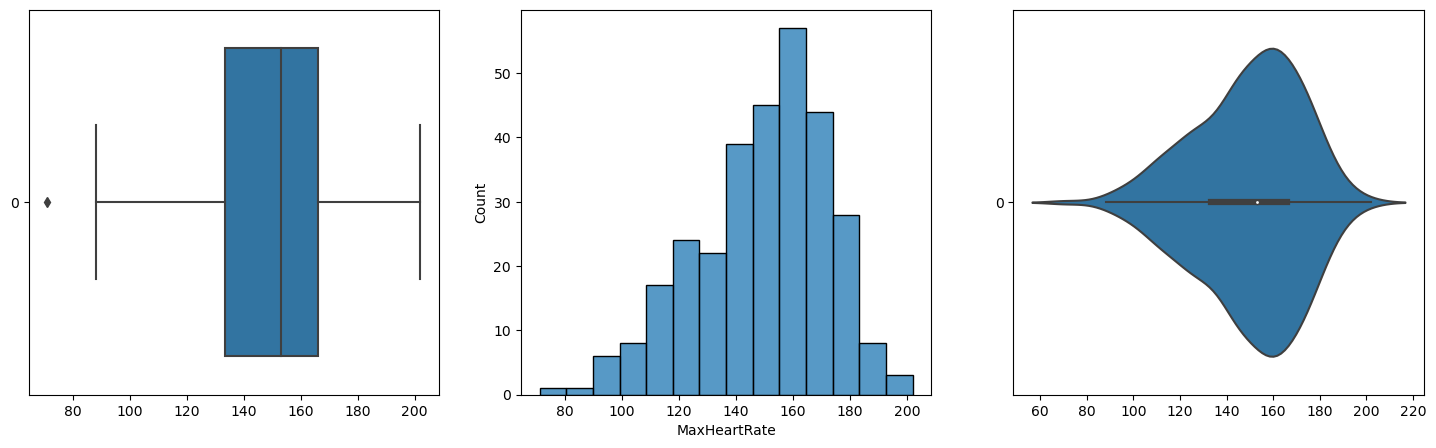

MaxHeartRate outliers: 1
Lower bound: 84.75
Upper bound: 214.75
Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.


In [168]:
univariateData(numericalData,'MaxHeartRate')

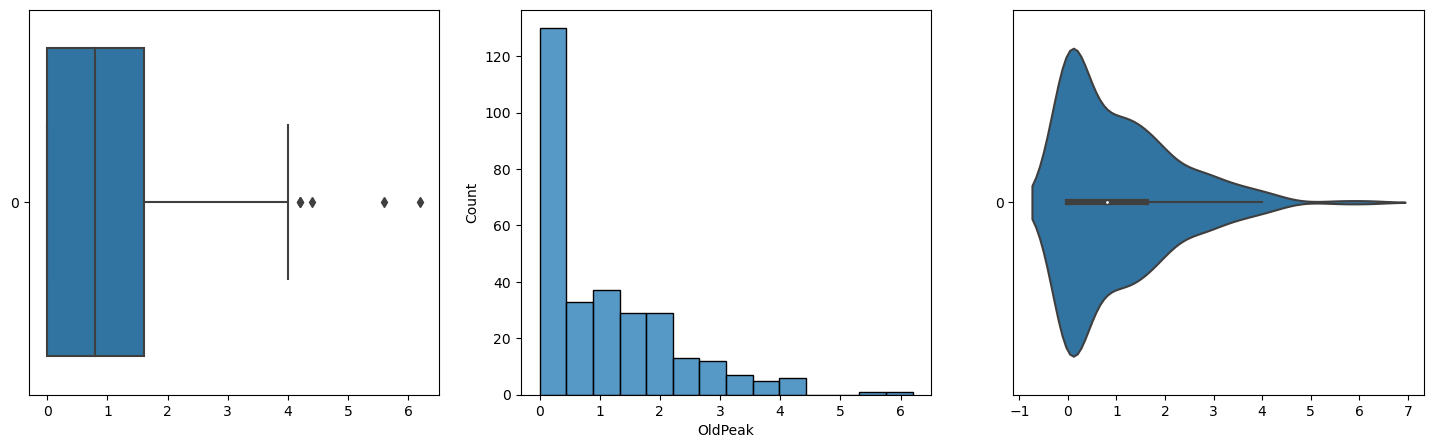

OldPeak outliers: 5
Lower bound: -2.4000000000000004
Upper bound: 4.0
Skewness of the OldPeak variable: 1.270
The distribution is right-skewed.


In [169]:
univariateData(numericalData,'OldPeak')   

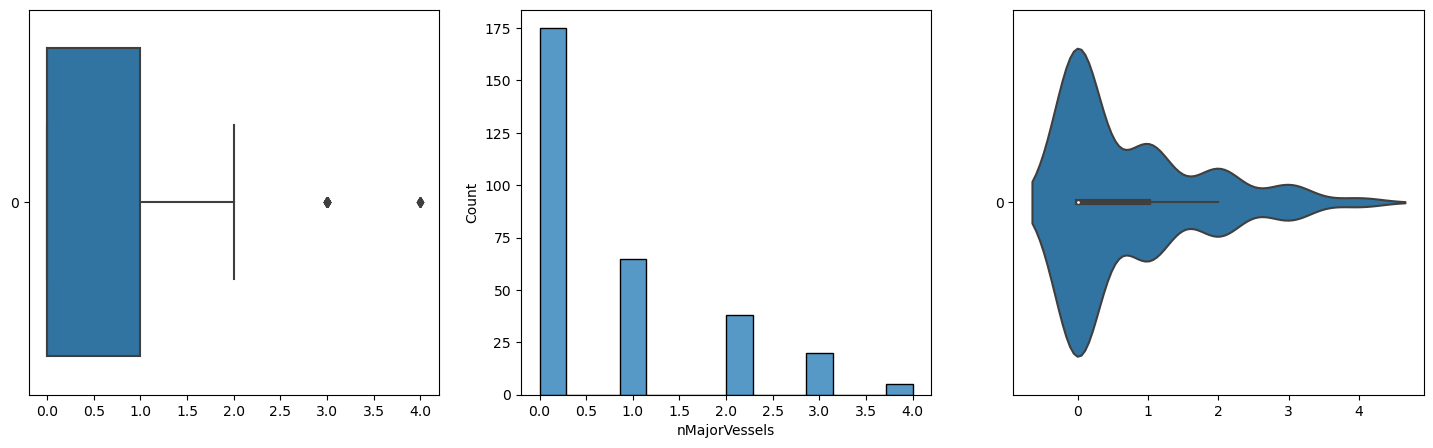

nMajorVessels outliers: 25
Lower bound: -1.5
Upper bound: 2.5
Skewness of the nMajorVessels variable: 1.310
The distribution is right-skewed.


In [170]:
univariateData(numericalData,'nMajorVessels')

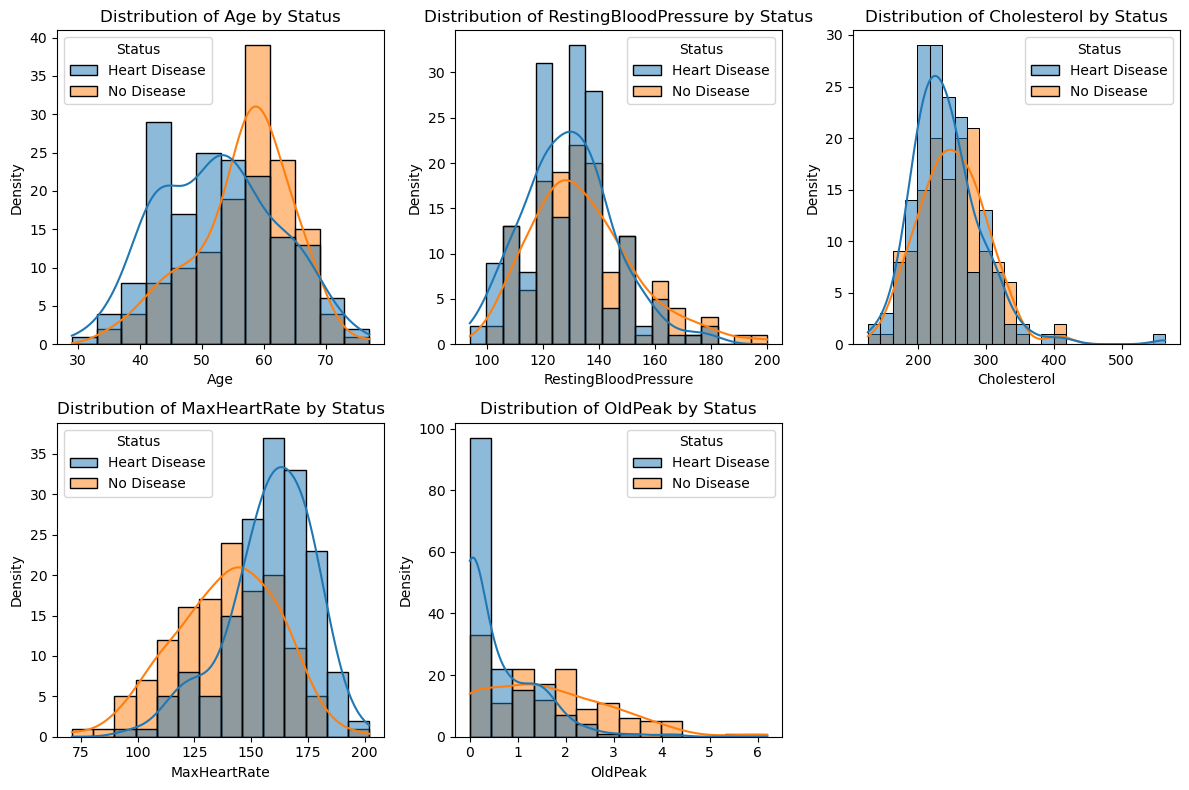

In [171]:
numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sb.histplot(data=df, x=feature, hue='Status', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

axes[1, 2].remove()

plt.tight_layout()
plt.show()

Next, we will perform univariate analysis, for each categorical data variable

[Text(0, 0, '207'), Text(0, 0, '96')]

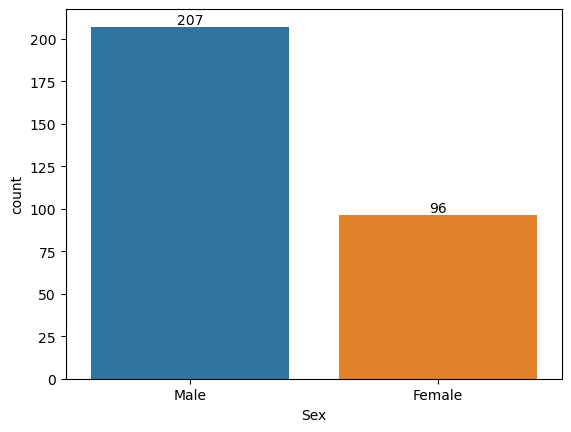

In [172]:
ax = sb.countplot(x ='Sex', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '23'), Text(0, 0, '87'), Text(0, 0, '50'), Text(0, 0, '143')]

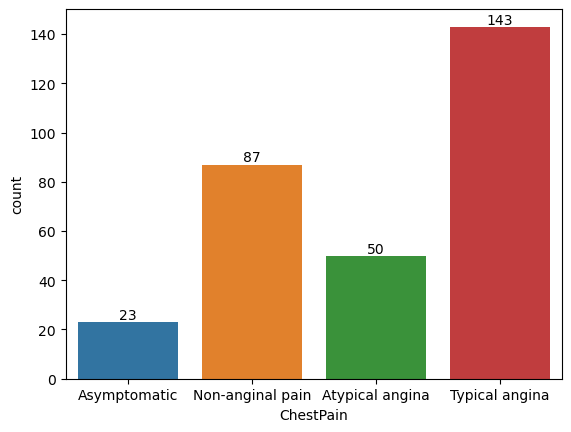

In [173]:
ax = sb.countplot(x ='ChestPain', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '258'), Text(0, 0, '45')]

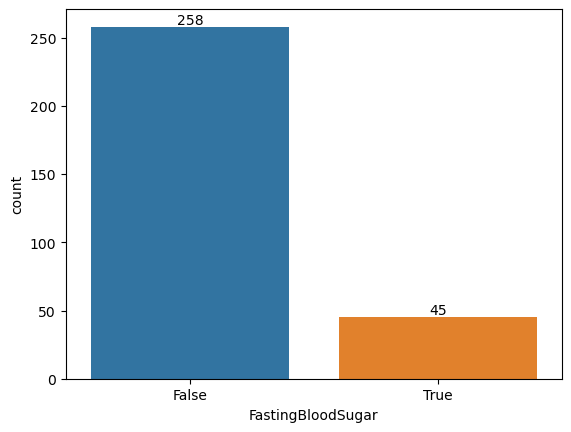

In [174]:
ax = sb.countplot(x ='FastingBloodSugar', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '147'), Text(0, 0, '152'), Text(0, 0, '4')]

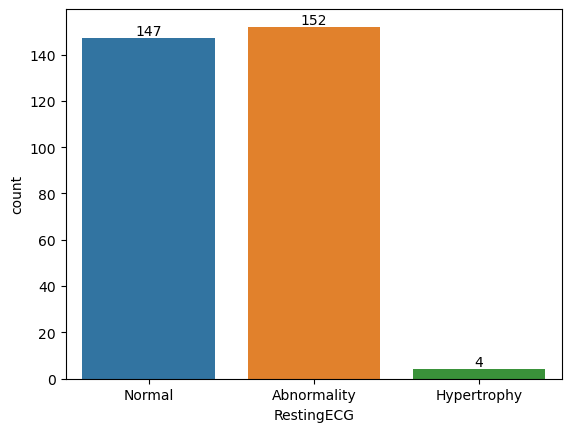

In [175]:
ax = sb.countplot(x ='RestingECG', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '204'), Text(0, 0, '99')]

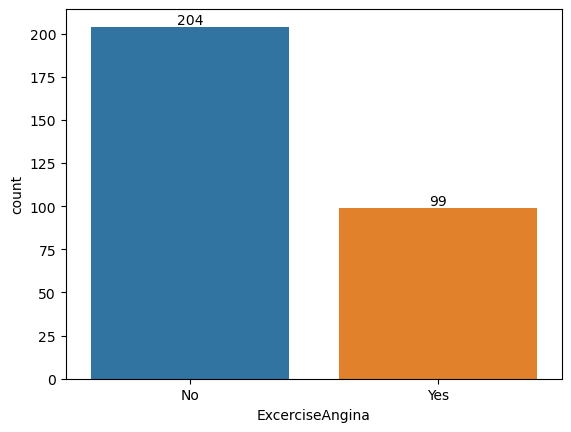

In [176]:
ax = sb.countplot(x ='ExcerciseAngina', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '21'), Text(0, 0, '142'), Text(0, 0, '140')]

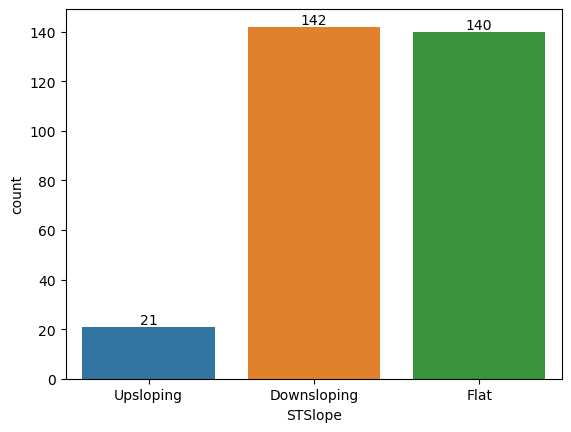

In [177]:
ax = sb.countplot(x ='STSlope', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '18'), Text(0, 0, '166'), Text(0, 0, '117'), Text(0, 0, '2')]

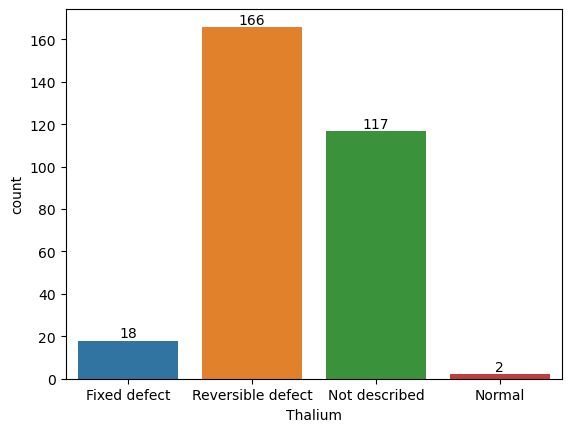

In [178]:
ax = sb.countplot(x ='Thalium', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '165'), Text(0, 0, '138')]

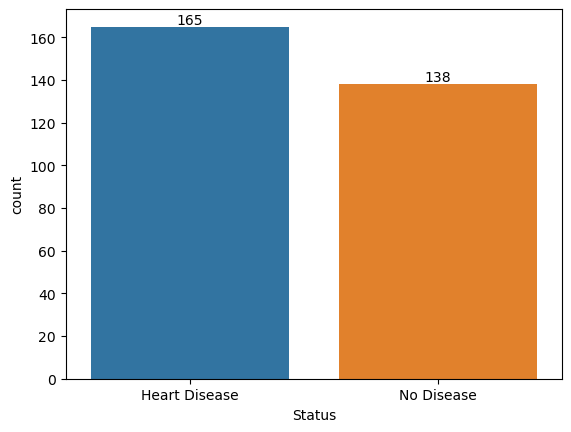

In [179]:
ax = sb.countplot(x ='Status', data = categoricalData)
ax.bar_label(ax.containers[0])

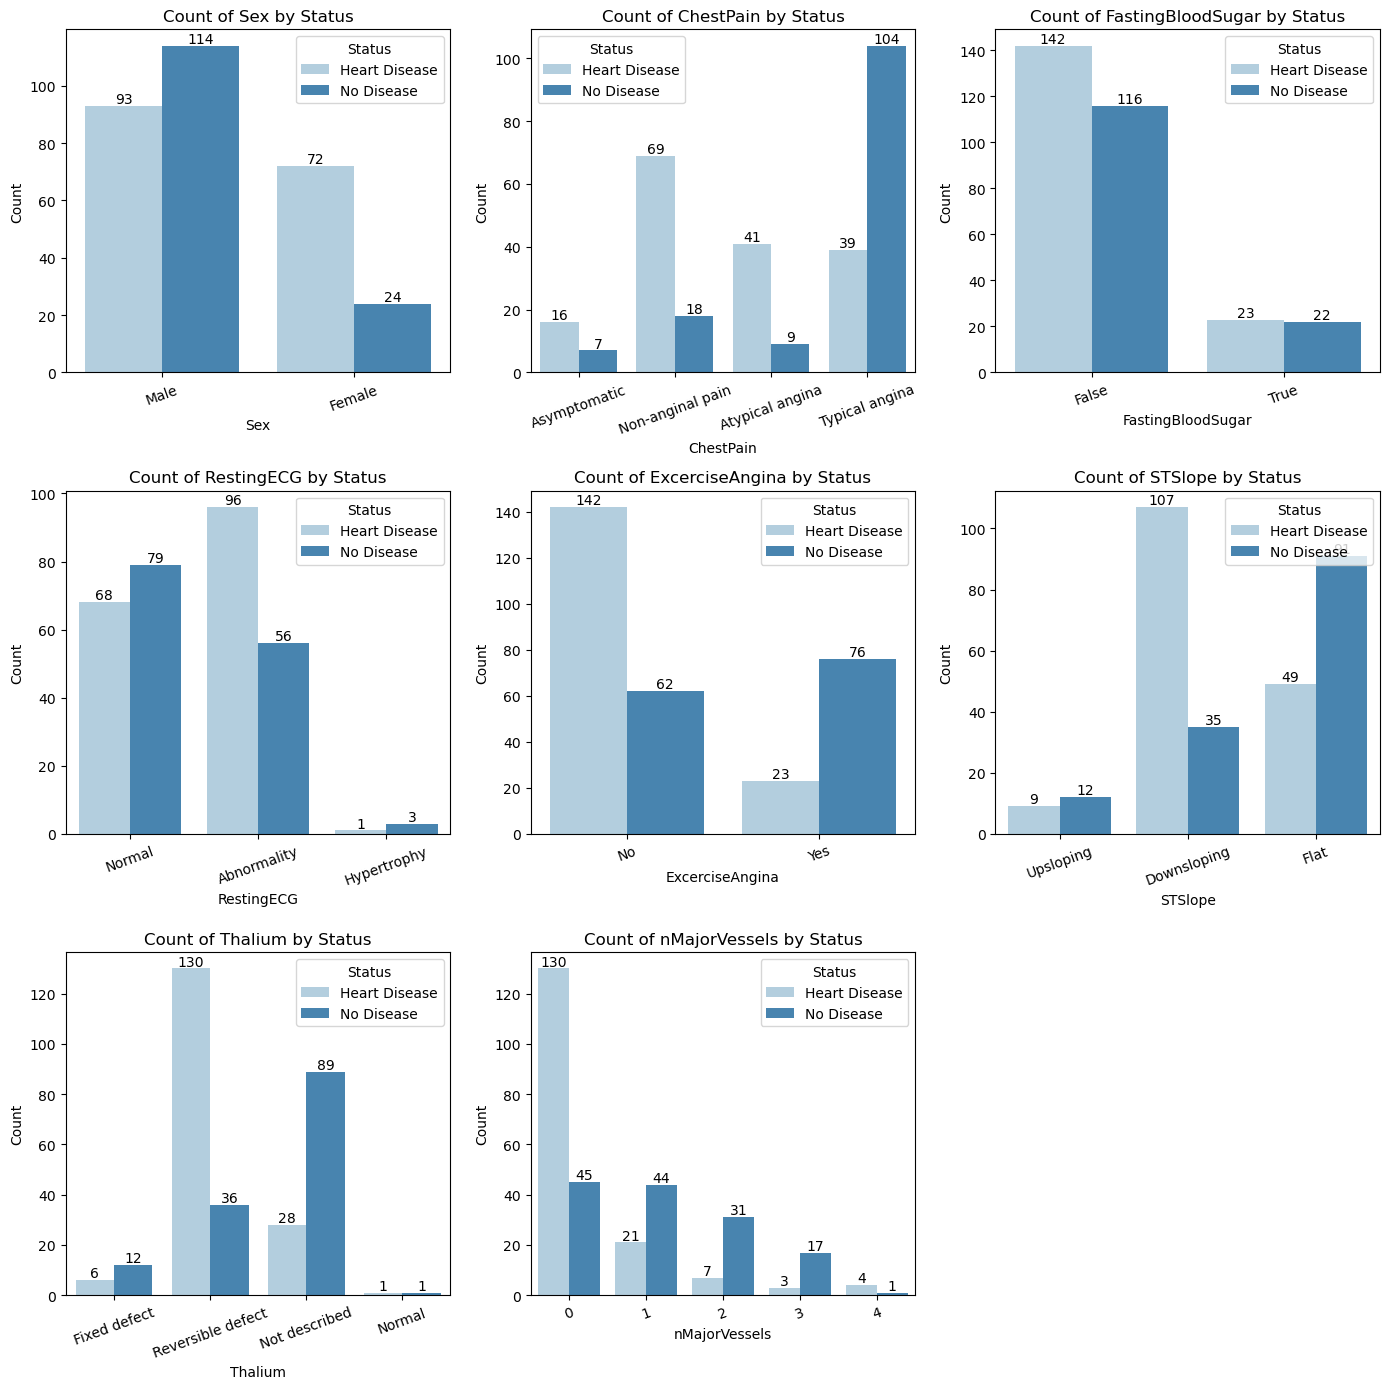

In [180]:
categorical_features = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExcerciseAngina', 'STSlope', 'Thalium', 'nMajorVessels']

num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sb.countplot(data=df, x=feature, hue='Status', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

## Step 5 Preprocessing 
Removal of outliers to clean and improve the data

In [182]:
# display the duplicated rows that will be removed
duplicatedata = df.duplicated()
df[duplicatedata]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
164,38,Male,Non-anginal pain,138,175,False,Abnormality,173,No,0.0,Downsloping,4,Reversible defect,Heart Disease


In [183]:
# remove the duplicates from the original dataframe
removedDuplicatesdf = df.drop_duplicates(keep='first')
#removedDuplicatesdf.info()

# split the cleaned dataframe back into numerical and categorical data
numericalData = removedDuplicatesdf[numerical_columns]
categoricalData = removedDuplicatesdf[categorical_columns]

Removal of duplicated values

## Step 6 Encoding categorical variables as numerical

Conversion of data from categorical to numerical for easier analysis

Apply scaling to numerical data

## Step 7 Correlation analysis

Start by splitting the datasets for train and test

Using a correlation tree, analyse which data has the highest correlation

## Step 8 Scaling the data

Scale and standardize numerical features

## Step 9 Models
Using different models, determine which one is the most effective in generating an accurate prediction

KNN (K-Nearest Neighbors)

SVM (Support Vector Machine)

Decision Tree

ANN (Artificial Neural Networks)

Logical Regression

## Step 10 Conclusion